In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy.stats import sem

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker
from venn import venn, pseudovenn
import seaborn as sns
from matplotlib.collections import PathCollection

from Bio import SeqIO, SeqUtils
from Bio.SeqUtils.ProtParam import ProteinAnalysis

from addict import Dict
import json


In [3]:
import proteomics_functions as prot_fun

sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot

sys.path.append("/home/chase/my_work/correlation_aex_data/mean_field_electrostatics/v2")
import base_classes
import morbidelli as m

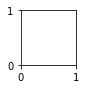

In [4]:
fig, ax = my_plot.instantiate_fig(1, 1)

# Load data


In [5]:
df_totals = pd.read_csv('./generated_tables/elisa_bradford_swath_and_dda_data.csv')

In [6]:
df_totals

,label,feed,frac,elisa_ppm,elisa_stdev_ppm,elisa_rsd_percent,den_bradford_stdev_mg_ml,bradford_rsd_percent,digest_method,swath_ppm,swath_stdev_ppm,swath_rsd_percent,n_dda,n_swath
0,HCCF Feed,hccf,feed,400000.0,151718.633700,37.929658,0.241040,4.820792,native,37401.367222,2243.519420,5.998496,1062.0,1131.0
1,HCCF Large agg.,hccf,large,127000.0,47085.079910,37.074866,0.102268,2.045369,native,186442.925701,5343.532827,2.866042,1709.0,1980.0
2,HCCF Small agg.,hccf,small,101000.0,21960.718110,21.743285,0.199342,3.986831,native,110588.105207,4574.558201,4.136573,1390.0,1635.0
3,HCCF mAb,hccf,mab,162000.0,75029.087230,46.314251,0.199047,3.980937,native,16225.097508,948.776676,5.847587,593.0,783.0
4,HCCF SPF 1,hccf,spf1,607000.0,88846.062830,14.636913,0.171472,3.429449,native,43452.695814,1514.740942,3.485954,1012.0,1161.0
5,HCCF SPF 2,hccf,spf2,718000.0,156156.545300,21.748822,0.034840,6.968049,standard,133538.064700,10843.772213,8.120360,504.0,745.0
6,PAVIN Feed,pavin,feed,1510.0,860.315308,56.974524,0.158233,3.164659,native,1553.038451,58.595544,3.772962,104.0,348.0
7,PAVIN Large agg.,pavin,large,149000.0,87284.775990,58.580387,0.547865,10.957302,native,87179.396374,9619.728583,11.034406,1714.0,1883.0
8,PAVIN Small agg.,pavin,small,11200.0,NaN,NaN,0.502731,10.054629,native,20802.780379,2134.852037,10.262340,786.0,944.0
9,PAVIN mAb,pavin,mab,NaN,NaN,NaN,0.035538,0.710768,native,1.864600,0.070643,3.788643,2.0,4.0


# Plot

/home/chase/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/chase/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


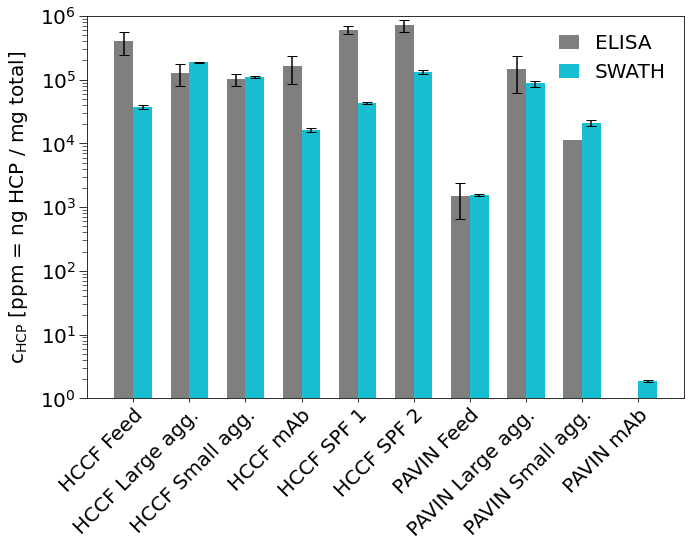

In [18]:
fig, ax = my_plot.instantiate_fig(x=10, y=8, ylabel=r'$\mathsf{c_{HCP}}$ [ppm = ng HCP / mg total]')
ticks = ax.set_xticks(df_totals.index, df_totals.label, rotation=45, ha='right', rotation_mode='anchor')
width = 1/3
rects_1 = ax.bar(df_totals.index-width/2, df_totals.elisa_ppm, width=width, label='ELISA', color='tab:grey')
err_1 = ax.errorbar(df_totals.index-width/2, df_totals.elisa_ppm, yerr=df_totals.elisa_stdev_ppm, fmt=' ', color='black', capsize=5)
rects_2 = ax.bar(df_totals.index+width/2, df_totals.swath_ppm, width=width, label='SWATH', color='tab:cyan')
err_2 = ax.errorbar(df_totals.index+width/2, df_totals.swath_ppm, yerr=df_totals.swath_stdev_ppm, fmt=' ', color='black', capsize=5)

ax.set_yscale('log')
ylim = ax.set_ylim(1, 1e6)
ax.tick_params(axis='y', which='major', length=8)
ax.tick_params(axis='y', which='minor', length=5)
my_plot.set_layout(fig, ax, legend=True)

plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart.png', dpi=300, bbox_inches='tight')
plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart.tif', dpi=300, bbox_inches='tight')
plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


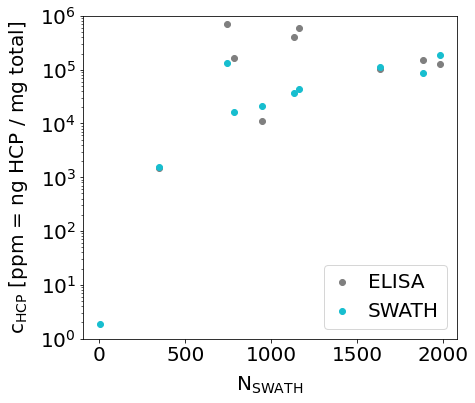

In [19]:
fig, ax = my_plot.instantiate_fig(xlabel=r'$\mathsf{N_{SWATH}}$', ylabel=r'$\mathsf{c_{HCP}}$ [ppm = ng HCP / mg total]')
ax.scatter(df_totals.n_swath, df_totals.elisa_ppm, label='ELISA', color='tab:grey')
ax.scatter(df_totals.n_swath, df_totals.swath_ppm, label='SWATH', color='tab:cyan')
ax.set_yscale('log')
ax.set_ylim(1, 1e6)
my_plot.set_layout(fig, ax, legend=True, loc='lower right', frameon=True)
plt.savefig('./images/9_c_vs_n_swath.png', dpi=300)
plt.savefig('./images/9_c_vs_n_swath.tif', dpi=300)
plt.savefig('./images/9_c_vs_n_swath.eps', dpi=300)

/home/chase/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/chase/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


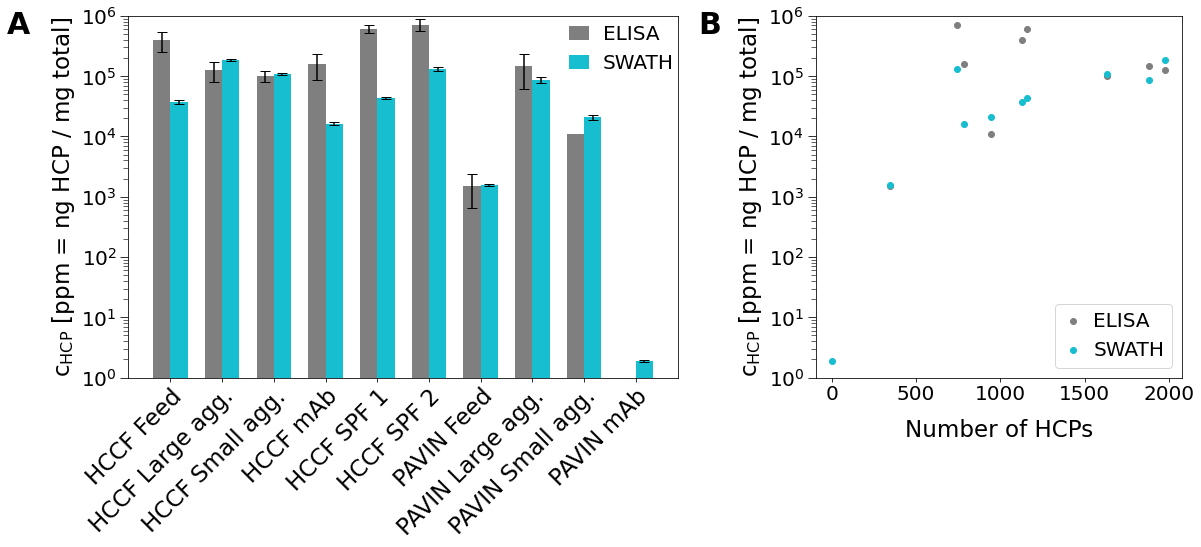

In [31]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.5, 1]})
fig.set_size_inches(17, 8, forward=True)
fontsize=23

for i in range(2):
    ax[i].set_ylabel(r'$\mathsf{c_{HCP}}$ [ppm = ng HCP / mg total]', fontsize=fontsize)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1, 1e6)
    ax[i].tick_params(axis='y', which='major', length=8)
    ax[i].tick_params(axis='y', which='minor', length=5)

ticks = ax[0].set_xticks(df_totals.index, df_totals.label, rotation=45, ha='right', rotation_mode='anchor', fontsize=fontsize)
width = 1/3
rects_1 = ax[0].bar(df_totals.index-width/2, df_totals.elisa_ppm, width=width, label='ELISA', color='tab:grey')
err_1 = ax[0].errorbar(df_totals.index-width/2, df_totals.elisa_ppm, yerr=df_totals.elisa_stdev_ppm, fmt=' ', color='black', capsize=5)
rects_2 = ax[0].bar(df_totals.index+width/2, df_totals.swath_ppm, width=width, label='SWATH', color='tab:cyan')
err_2 = ax[0].errorbar(df_totals.index+width/2, df_totals.swath_ppm, yerr=df_totals.swath_stdev_ppm, fmt=' ', color='black', capsize=5)

# ax[1].set_xlabel(r'$\mathsf{N_{SWATH}}$')
ax[1].set_xlabel('Number of HCPs', labelpad=15, fontsize=fontsize)
ax[1].scatter(df_totals.n_swath, df_totals.elisa_ppm, label='ELISA', color='tab:grey')
ax[1].scatter(df_totals.n_swath, df_totals.swath_ppm, label='SWATH', color='tab:cyan')

ax[0].annotate('A', xy=(-0.22, 0.95), xycoords=ax[0].transAxes, weight='bold', fontsize=30)
ax[1].annotate('B', xy=(-0.32, 0.95), xycoords=ax[1].transAxes, weight='bold', fontsize=30)

ax[0].legend(handlelength=1, frameon=False, fontsize=20, handletextpad=0.7, bbox_to_anchor=(1.025, 1.025), loc='upper right')
ax[1].legend(loc='lower right', handlelength=1, frameon=True, fontsize=20, handletextpad=0.5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart_and_n_hcps_scatter.png', dpi=300)
plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart_and_n_hcps_scatter.tif', dpi=300)
plt.savefig('./images/8_ELISA_vs_SWATH_bar_chart_and_n_hcps_scatter.eps', dpi=300)

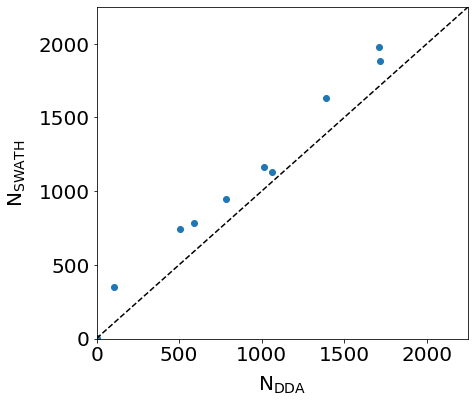

In [25]:
fig, ax = my_plot.instantiate_fig(xlabel=r'$\mathsf{N_{DDA}}$', ylabel=r'$\mathsf{N_{SWATH}}$')
ax.scatter(df_totals.n_dda, df_totals.n_swath)
ax.plot([0, 2250], [0, 2250], 'k--')
ax.set_xlim(0, 2250)
ax.set_ylim(0, 2250)
my_plot.set_layout(fig, ax)
plt.savefig('./images/9_n_swath_vs_n_dda.png', dpi=300)
plt.savefig('./images/9_n_swath_vs_n_dda.tif', dpi=300)
plt.savefig('./images/9_n_swath_vs_n_dda.eps', dpi=300)

# Short list method investigation - PAVIN mAb

In [28]:
df_swath = pd.read_csv('./generated_tables/swath_master_df_ppm.csv')

In [33]:
aoi = 'XP_027260201.1'
aoi in list(df_swath[df_swath.pavin_mab > 0.0].accn)

True

In [36]:
file = pd.ExcelFile('./data/CH_20220421_PAFVIN DDA zero.xlsx')
df_nat_pavin_mab = file.parse('PAFVIN mAb')

file = pd.ExcelFile('./data/CH_CrossDigestStandard_DDA.xlsx')
df_std_pavin_mab = file.parse('PAFVIN mAb')

In [37]:
(aoi in list(df_std_pavin_mab['Accession'])) or (aoi in list(df_nat_pavin_mab['Accession']))

False

In [38]:
df_swath[df_swath.accn == aoi]

,accn,name,hccf_feed,hccf_large,hccf_small,hccf_mab,hccf_spf1,hccf_spf2,pavin_feed,pavin_large,pavin_small,pavin_mab
482,XP_027260201.1,serine protease HTRA1 isoform X3 [Cricetulus g...,158.669206,4055.905572,1213.953813,23.893492,298.248626,563.050327,116.107668,2085.766382,574.090794,0.355977


In [41]:
df_swath[df_swath.pavin_mab > 0.0]

,accn,name,hccf_feed,hccf_large,hccf_small,hccf_mab,hccf_spf1,hccf_spf2,pavin_feed,pavin_large,pavin_small,pavin_mab
158,XP_027246103.1,clusterin [Cricetulus griseus],1116.343358,19098.739793,12198.069924,335.430732,249.386225,602.973053,498.959310,16375.565451,5966.987435,0.821371
482,XP_027260201.1,serine protease HTRA1 isoform X3 [Cricetulus g...,158.669206,4055.905572,1213.953813,23.893492,298.248626,563.050327,116.107668,2085.766382,574.090794,0.355977
710,XP_027269956.1,putative phospholipase B-like 2 [Cricetulus gr...,103.191256,1024.130193,296.206341,146.670159,29.200703,76.545820,9.765162,286.950564,92.950772,0.409507
991,XP_027282301.1,C-C motif chemokine 2 [Cricetulus griseus],2391.097146,153.580907,85.024897,1665.607925,2258.160534,7394.202068,1.747352,59.749513,30.572851,0.277746
